<img src="https://www.worldhistory.org/uploads/images/14047.png" alt="Titanic" width="1100" height='600' /> 

# Random Forest Model for Titanic Kaggle Competition

<img src="https://cdn.dida.do/bird-(9)-1733138076.png" alt="Titanic" width="700" height='600' />

## Import Libraries and Data

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [6]:
# Import data
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Set model hyperparameters

In [32]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0, verbose=False)

In [9]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

## Define function to convert Sex values into Binaries

In [10]:
def binary_sex(x):
    if x == 'female':
        return 1
    else:
        return 0

## Create a new column maping the function

In [11]:
train['Sex_binary'] = train['Sex'].map(binary_sex)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Set variables (Gender and Age) 

In [13]:
variables = ['Sex_binary', 'Age']

In [14]:
X = train[variables]
y = train['Survived']

## Fill the NaN values with -1 values

In [15]:
X = X.fillna(-1)

In [16]:
X.head()

,Sex_binary,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [17]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

----

## Fit the model to the training dataset

In [43]:
from sklearn.model_selection import RepeatedKFold

### Cross-validation

In [47]:
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=0)

In [49]:
results = []


for lines_train, lines_valid in kf.split(X):
    print("Train:", lines_train.shape[0])
    print("Validation:", lines_valid.shape[0])
    print()

    X_train, X_valid = X.iloc[lines_train], X.iloc[lines_valid]
    y_train, y_valid = y.iloc[lines_train], y.iloc[lines_valid]

    model.fit(X_train, y_train)

    p = model.predict(X_valid)

    acc = np.mean(y_valid == p)
    results.append(acc)
    print('Acc:', acc)
    print()

Train: 445
Validation: 446

Acc: 0.7713004484304933

Train: 446
Validation: 445

Acc: 0.7797752808988764

Train: 445
Validation: 446

Acc: 0.7331838565022422

Train: 446
Validation: 445

Acc: 0.7640449438202247

Train: 445
Validation: 446

Acc: 0.7466367713004485

Train: 446
Validation: 445

Acc: 0.7617977528089888

Train: 445
Validation: 446

Acc: 0.757847533632287

Train: 446
Validation: 445

Acc: 0.7617977528089888

Train: 445
Validation: 446

Acc: 0.757847533632287

Train: 446
Validation: 445

Acc: 0.7707865168539326

Train: 445
Validation: 446

Acc: 0.7466367713004485

Train: 446
Validation: 445

Acc: 0.7617977528089888

Train: 445
Validation: 446

Acc: 0.7645739910313901

Train: 446
Validation: 445

Acc: 0.7685393258426966

Train: 445
Validation: 446

Acc: 0.7399103139013453

Train: 446
Validation: 445

Acc: 0.7707865168539326

Train: 445
Validation: 446

Acc: 0.7399103139013453

Train: 446
Validation: 445

Acc: 0.7393258426966293

Train: 445
Validation: 446

Acc: 0.7421524663677

In [51]:
results

[np.float64(0.7713004484304933),
 np.float64(0.7797752808988764),
 np.float64(0.7331838565022422),
 np.float64(0.7640449438202247),
 np.float64(0.7466367713004485),
 np.float64(0.7617977528089888),
 np.float64(0.757847533632287),
 np.float64(0.7617977528089888),
 np.float64(0.757847533632287),
 np.float64(0.7707865168539326),
 np.float64(0.7466367713004485),
 np.float64(0.7617977528089888),
 np.float64(0.7645739910313901),
 np.float64(0.7685393258426966),
 np.float64(0.7399103139013453),
 np.float64(0.7707865168539326),
 np.float64(0.7399103139013453),
 np.float64(0.7393258426966293),
 np.float64(0.742152466367713),
 np.float64(0.7730337078651686)]

In [50]:
np.mean(results)

np.float64(0.7575842696629215)

(array([1., 4., 2., 0., 0., 2., 5., 1., 4., 1.]),
 array([0.73318386, 0.737843  , 0.74250214, 0.74716128, 0.75182043,
        0.75647957, 0.76113871, 0.76579785, 0.770457  , 0.77511614,
        0.77977528]),
 <BarContainer object of 10 artists>)

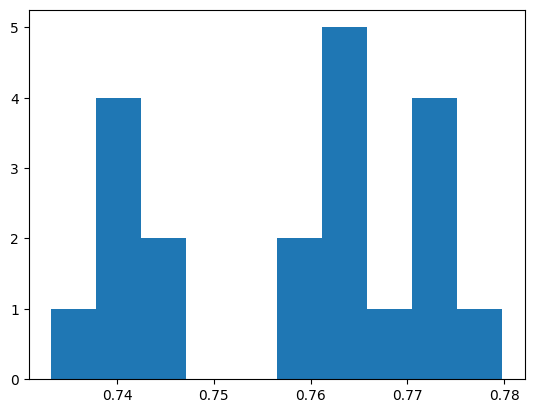

In [53]:
plt.hist(results)

----

## Adding more variables

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [55]:
variables = ['Sex_binary', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [56]:
X = train[variables].fillna(-1)
y = train['Survived']

In [57]:
results = []


for lines_train, lines_valid in kf.split(X):
    print("Train:", lines_train.shape[0])
    print("Validation:", lines_valid.shape[0])
    print()

    X_train, X_valid = X.iloc[lines_train], X.iloc[lines_valid]
    y_train, y_valid = y.iloc[lines_train], y.iloc[lines_valid]

    model.fit(X_train, y_train)

    p = model.predict(X_valid)

    acc = np.mean(y_valid == p)
    results.append(acc)
    print('Acc:', acc)
    print()

Train: 445
Validation: 446

Acc: 0.7937219730941704

Train: 446
Validation: 445

Acc: 0.8314606741573034

Train: 445
Validation: 446

Acc: 0.8116591928251121

Train: 446
Validation: 445

Acc: 0.8157303370786517

Train: 445
Validation: 446

Acc: 0.8094170403587444

Train: 446
Validation: 445

Acc: 0.8

Train: 445
Validation: 446

Acc: 0.8094170403587444

Train: 446
Validation: 445

Acc: 0.7910112359550562

Train: 445
Validation: 446

Acc: 0.7892376681614349

Train: 446
Validation: 445

Acc: 0.8089887640449438

Train: 445
Validation: 446

Acc: 0.7892376681614349

Train: 446
Validation: 445

Acc: 0.8337078651685393

Train: 445
Validation: 446

Acc: 0.7937219730941704

Train: 446
Validation: 445

Acc: 0.7932584269662921

Train: 445
Validation: 446

Acc: 0.7869955156950673

Train: 446
Validation: 445

Acc: 0.8179775280898877

Train: 445
Validation: 446

Acc: 0.8004484304932735

Train: 446
Validation: 445

Acc: 0.7752808988764045

Train: 445
Validation: 446

Acc: 0.8116591928251121

Train: 4

(array([1., 0., 4., 3., 2., 3., 3., 2., 0., 2.]),
 array([0.7752809 , 0.7811236 , 0.78696629, 0.79280899, 0.79865169,
        0.80449438, 0.81033708, 0.81617978, 0.82202247, 0.82786517,
        0.83370787]),
 <BarContainer object of 10 artists>)

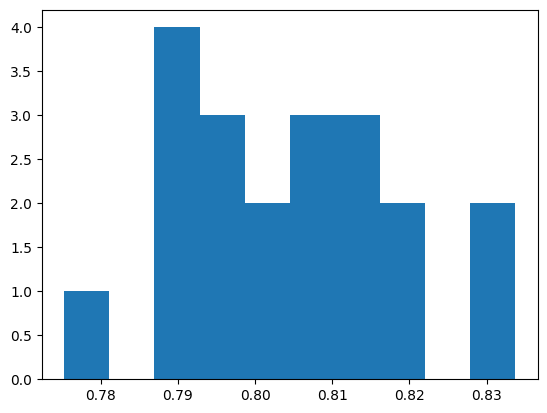

In [58]:
plt.hist(results)

In [59]:
np.mean(results)

np.float64(0.8040454476747116)

In [62]:
model.fit(X,y)

p = model.predict(test[variables].fillna(-1))

## Create Submission

In [63]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [64]:
sub.to_csv('model_crossvalidation.csv', header=True)